# Mantenimiento Predictivo de Equipos Mineros - Etapa 1
Este notebook corresponde a la Etapa 1 del plan de trabajo para desarrollar un modelo predictivo.

Se trabajará en la exploración del dataset, preprocesamiento y creación de un modelo de machine learning.



## Importación de bibliotecas y carga del dataset

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

file_path = "../datasets/machine_failure.csv"
df = pd.read_csv(file_path)

df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Exploración de datos

In [86]:
print("Información básica del dataset:")
print(df.info())

print("\nEstadísticas descriptivas del dataset:")
print(df.describe())

print("\nValores faltantes por columna:")
print(df.isnull().sum())

print("\nDistribución de la variable objetivo:")
print(df['Machine failure'].value_counts())

Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int6

## Visualización de datos

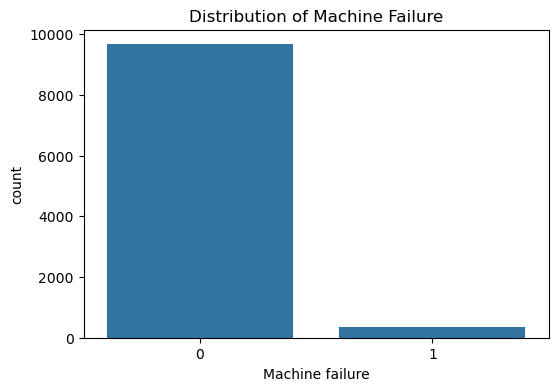

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure')
plt.show()


### Histogramas de cada característica para comprender sus distribuciones

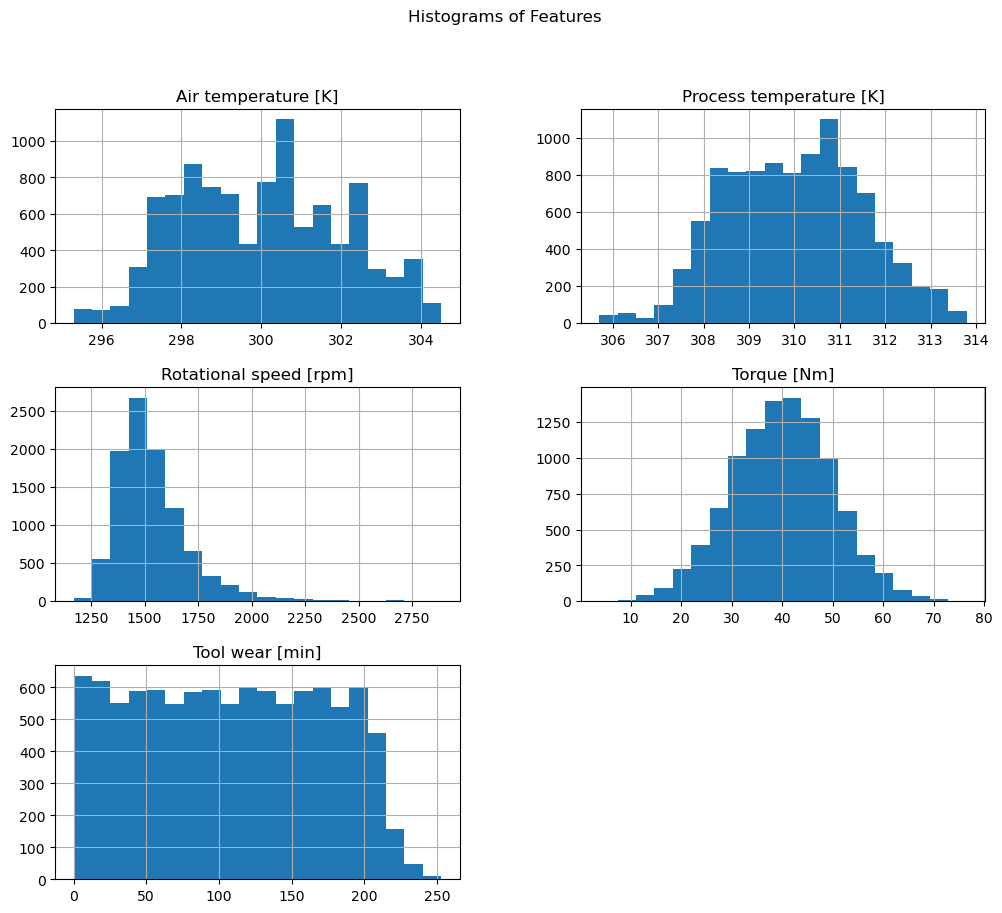

In [88]:
df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]].hist(figsize=(12,10), bins=20)
plt.suptitle('Histograms of Features')
plt.show()


### Visualizing Pairwise Relationships (Scatter Plot Matrix)

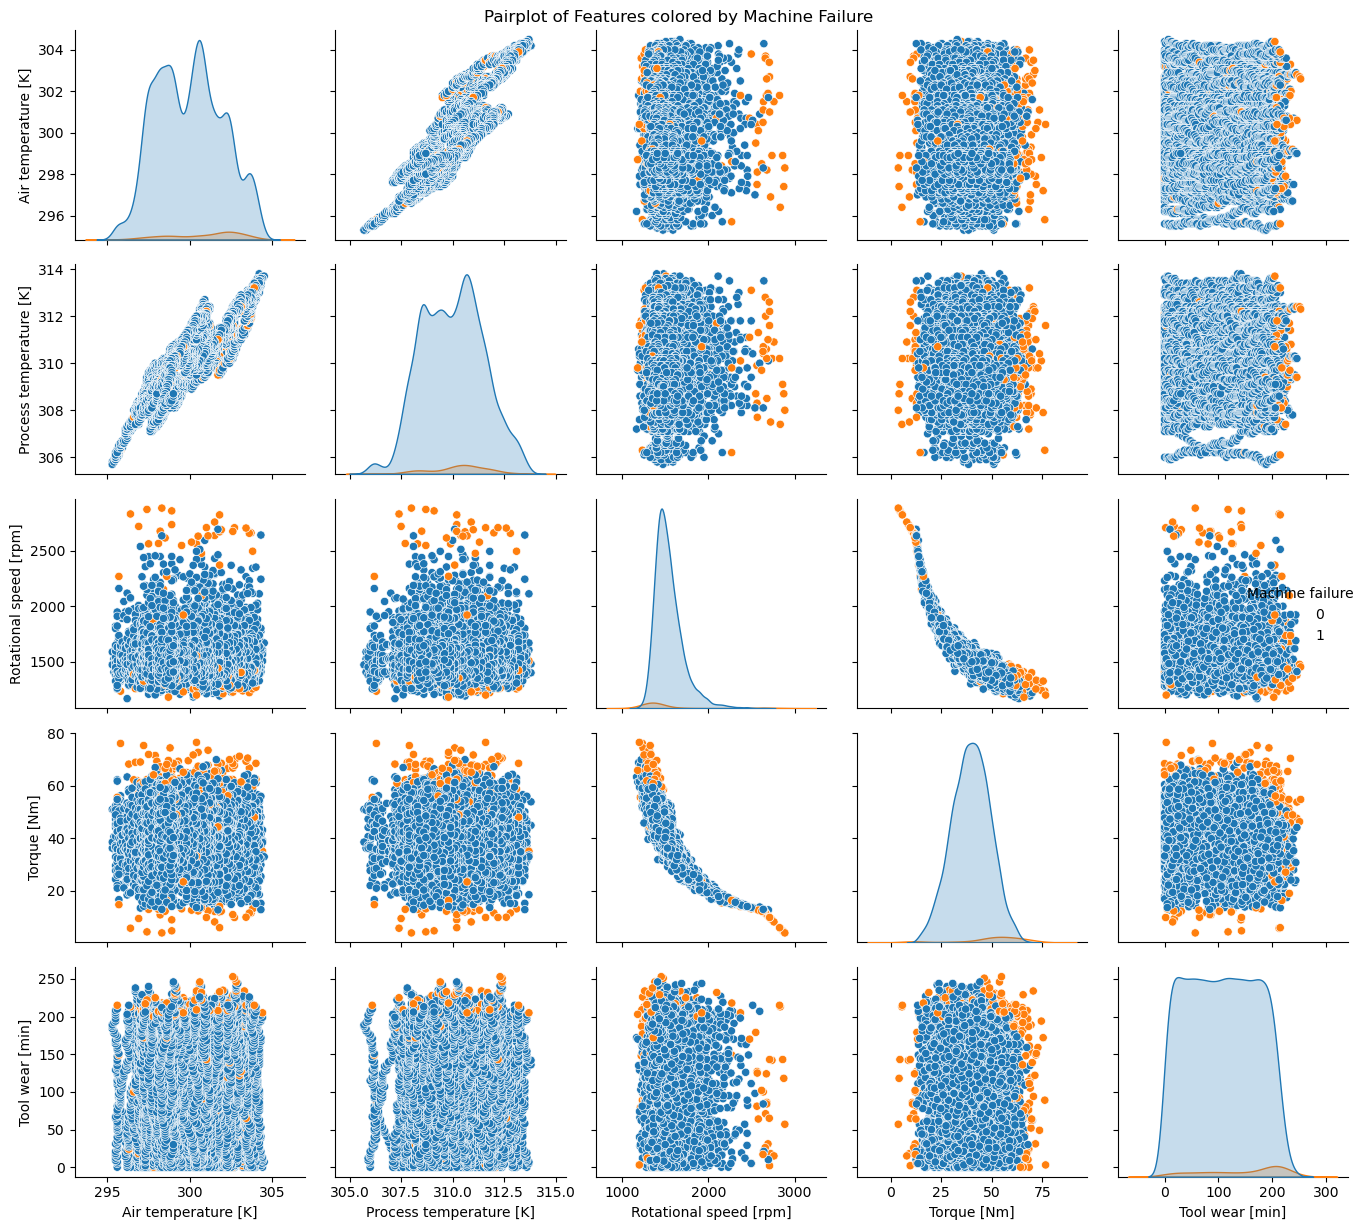

In [89]:
sns.pairplot(df, hue='Machine failure', vars=["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"])
plt.suptitle('Pairplot of Features colored by Machine Failure')
plt.tight_layout()
plt.show()

### Matriz de correlación de características y objetivo

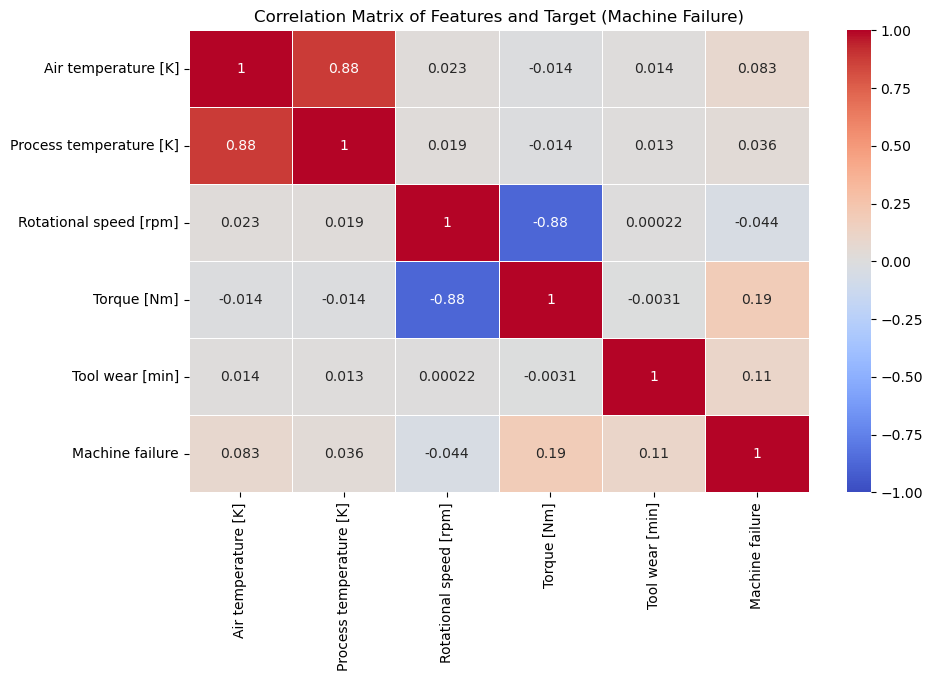

In [90]:
correlation_matrix = df[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Machine failure"]].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1)
plt.title('Correlation Matrix of Features and Target (Machine Failure)')
plt.show()



### Visualización de la relación de cada característica con la variable objetivo


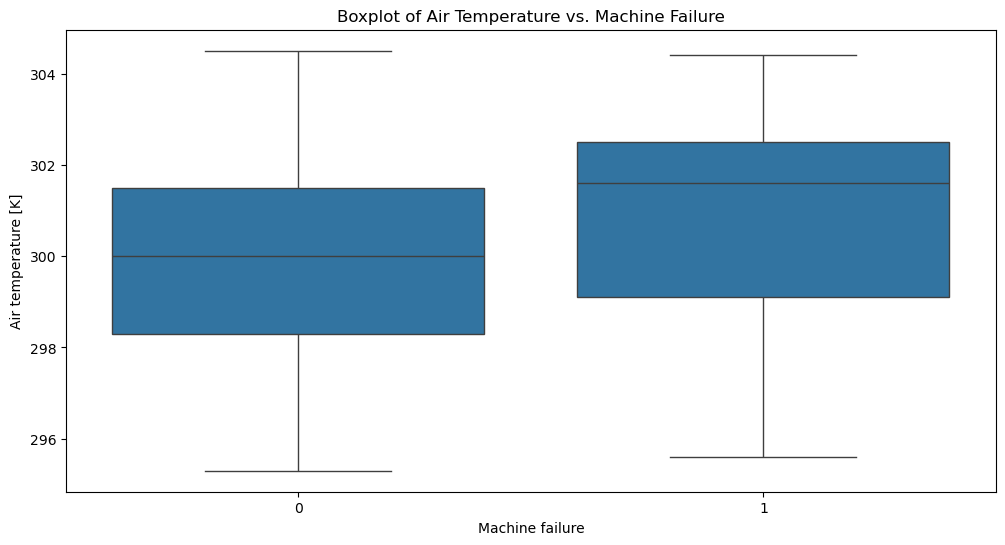

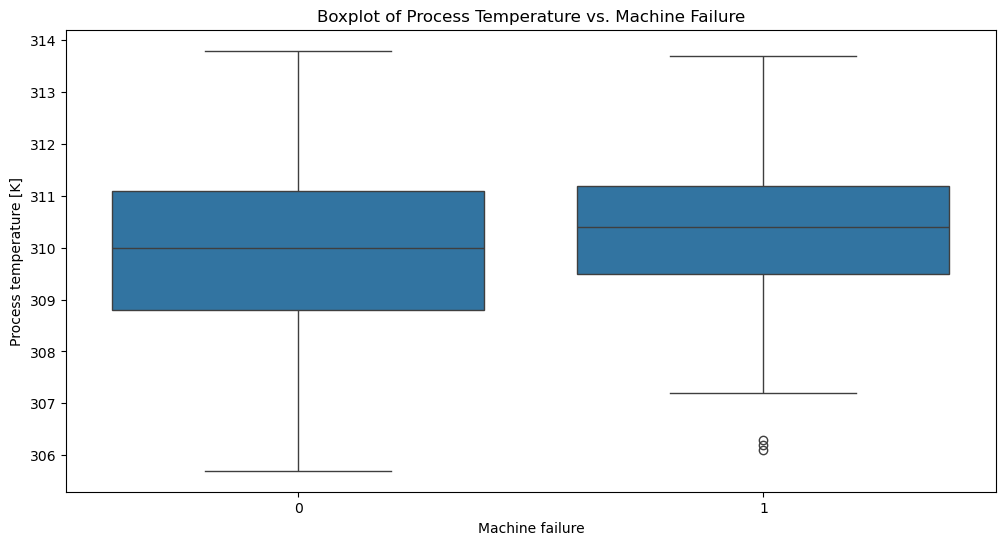

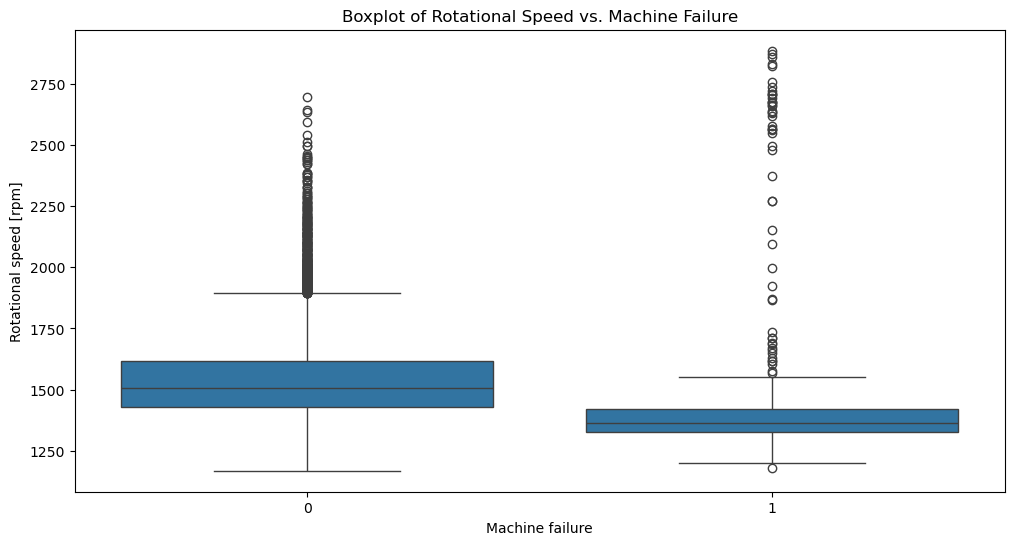

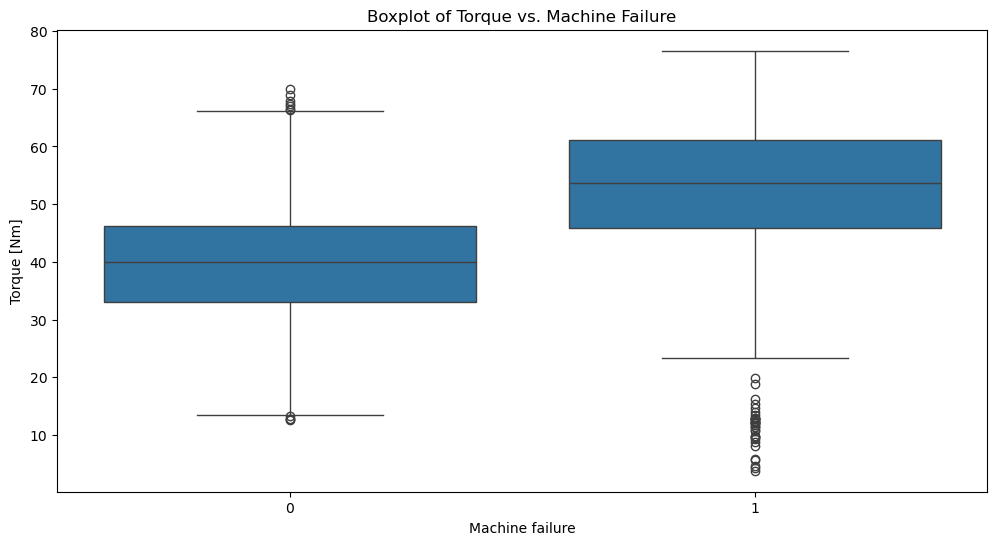

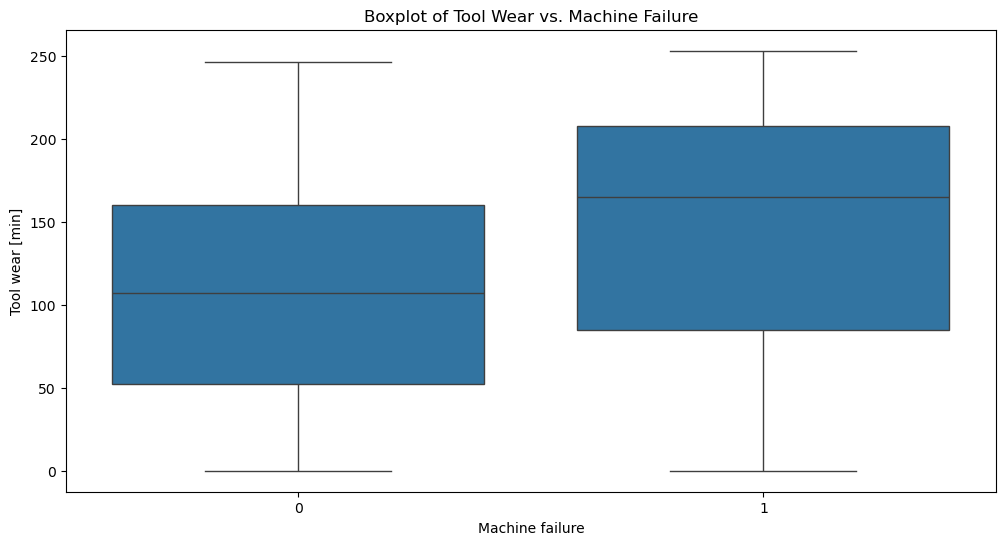

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=df)
plt.title('Boxplot of Air Temperature vs. Machine Failure')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Machine failure', y='Process temperature [K]', data=df)
plt.title('Boxplot of Process Temperature vs. Machine Failure')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df)
plt.title('Boxplot of Rotational Speed vs. Machine Failure')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=df)
plt.title('Boxplot of Torque vs. Machine Failure')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df)
plt.title('Boxplot of Tool Wear vs. Machine Failure')
plt.show()

## Selección de características y división de datos

In [92]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
            'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Entrenamiento del modelo

In [93]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)


## Evaluación del modelo

In [94]:
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy del modelo: 0.821

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1932
           1       0.14      0.82      0.24        68

    accuracy                           0.82      2000
   macro avg       0.57      0.82      0.57      2000
weighted avg       0.96      0.82      0.88      2000

